In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
df = pd.read_csv('data-mid-term.csv',header=0,delimiter=',',encoding='utf-8')

In [7]:
df

,FreeTime,StudyTime,Score,Sex,Result
0,0.50,1.50,2.50,M,0
1,0.75,0.75,2.00,F,0
2,1.00,1.00,2.50,L,0
3,1.25,1.25,2.75,G,0
4,1.50,4.00,3.50,B,0
...,...,...,...,...,...
495,1.80,9.00,2.50,T,1
496,4.30,5.50,0.00,M,1
497,0.80,4.50,1.80,F,0
498,0.00,0.80,3.30,L,1


In [11]:
X_with_constant = sm.add_constant(df[["FreeTime",'StudyTime']].values)

y = df[['Score']].values

# performing the regression
result = sm.OLS(y,X_with_constant).fit()

# Result of statsmodels
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5255
Date:                Wed, 28 Jun 2023   Prob (F-statistic):              0.592
Time:                        15:19:51   Log-Likelihood:                -913.40
No. Observations:                 500   AIC:                             1833.
Df Residuals:                     497   BIC:                             1845.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7060      0.174     15.539      0.0

In [13]:
df.groupby('Sex')['Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
B,80.0,2.431875,1.531861,0.0,1.0,2.3,3.80,5.0
F,85.0,2.644706,1.603976,0.0,1.3,2.5,4.00,5.0
G,85.0,2.422941,1.503242,0.0,1.3,2.5,3.80,5.0
L,85.0,2.701176,1.585237,0.0,1.3,2.8,4.00,5.0
M,85.0,2.753529,1.519081,0.0,1.8,2.8,4.00,5.0
T,80.0,2.362500,1.258201,0.0,1.3,2.3,3.35,5.0


In [29]:
df['StudyTime'].describe()

count    500.000000
mean       5.179200
std        2.960731
min        0.000000
25%        2.500000
50%        5.300000
75%        7.800000
max       10.000000
Name: StudyTime, dtype: float64

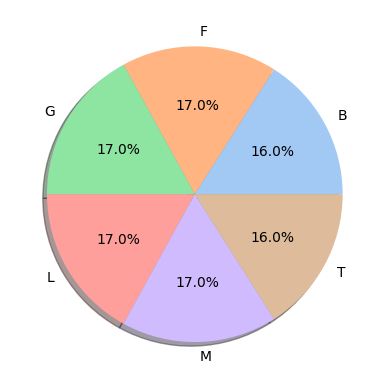

In [15]:
gb=df.groupby(['Sex'])['Sex'].agg(['count'])
labels=gb.index
data=list(gb['count'])

colors=sns.color_palette('pastel')#tạo bảng màu

plt.pie(data,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

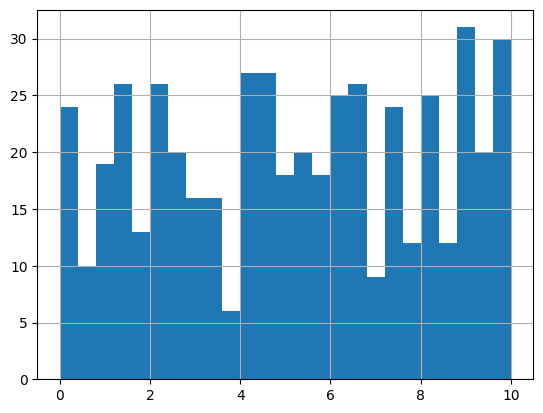

In [17]:

df['StudyTime'].hist(bins=25)
plt.show

In [23]:
df.groupby('Sex')['Result','StudyTime'].sum()

C:\Users\THANH DUOC\AppData\Local\Temp\ipykernel_18380\138486025.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sex')['Result','StudyTime'].sum()


,Result,StudyTime
Sex,,
B,45,418.75
F,40,464.15
G,45,440.45
L,45,437.65
M,50,393.55
T,50,435.05


In [26]:
print(df.pivot_table('Score', index='Sex', columns='class'))

KeyError: 'class'

<AxesSubplot:>

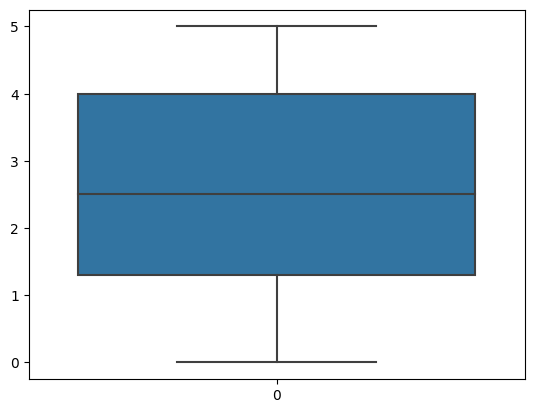

In [27]:

sns.boxplot(data=df['Score'])

<AxesSubplot:>

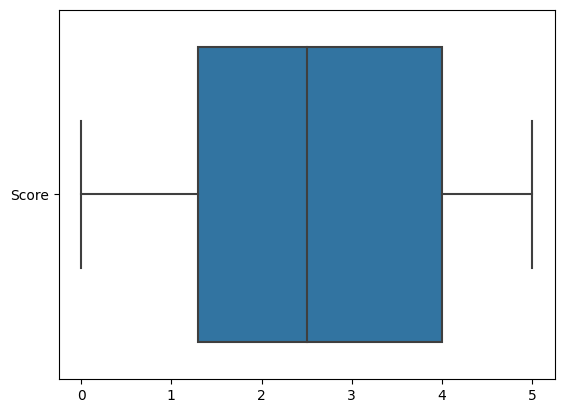

In [28]:
sns.boxplot(data=df[['Score']],orient='h')